In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:

rad0=50
ecc0=0.9
theta0=math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.5235987755982988
0.9
(array([3.66519143, 0.52359878]), 0.5235987755982988, 50, 0.9, array([1., 1.]))


VERIFIED FOR THETA=-45,45,135,180,90,30,-30. VERIFIED FOR ECC =0.001, 0.1,0.5, 0.7, 0.9, 0.95 VERIFIED FOR RAD0=50,75 100 

In [5]:
import getxyuvtwoellipse

In [6]:
xyuvaeqellipse=getxyuvtwoellipse.getxyuveqtwoellipses(initdateqellipse)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50 [3.66519143 0.52359878] 0.9 [-0.8660254  0.8660254] [-0.5  0.5]
coordsep 50
[-43.30127019  43.30127019]
[-25.  25.]
(array([1., 1.]), array([[-8.22724134e+01, -4.75000000e+01,  0.00000000e+00,
         8.11107106e-03, -1.40487872e-02,  0.00000000e+00],
       [ 8.22724134e+01,  4.75000000e+01,  0.00000000e+00,
        -8.11107106e-03,  1.40487872e-02,  0.00000000e+00]]), array([[ 2.39896234e-05,  1.38504155e-05,  0.00000000e+00],
       [-2.39896234e-05, -1.38504155e-05,  0.00000000e+00]]))


In [7]:
import RK4implicit

In [8]:
import OrbitDiffEq

In [9]:
masses, xvec,avec=xyuvaeqellipse
ODEeq= OrbitDiffEq.OrbitDiffEq(masses,xvec,avec,0.0)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0
[1. 1.] [[-8.22724134e+01 -4.75000000e+01  0.00000000e+00  8.11107106e-03
  -1.40487872e-02  0.00000000e+00]
 [ 8.22724134e+01  4.75000000e+01  0.00000000e+00 -8.11107106e-03
   1.40487872e-02  0.00000000e+00]] 0.0


In [10]:
print(xyuvaeqellipse)

(array([1., 1.]), array([[-8.22724134e+01, -4.75000000e+01,  0.00000000e+00,
         8.11107106e-03, -1.40487872e-02,  0.00000000e+00],
       [ 8.22724134e+01,  4.75000000e+01,  0.00000000e+00,
        -8.11107106e-03,  1.40487872e-02,  0.00000000e+00]]), array([[ 2.39896234e-05,  1.38504155e-05,  0.00000000e+00],
       [-2.39896234e-05, -1.38504155e-05,  0.00000000e+00]]))


In [11]:
import timestep

In [12]:
numsteps=6000*1.5
dt=1
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a= timestep.timestep(numsteps,dt,xyuvaeqellipse,outputevery)

In [13]:
import ellipsefns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import numpy as np
# create a new plot with default tools, using figure
p = figure(title="Elliptical orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees", plot_width=400, plot_height=400, x_range=(-200,200), y_range=(-200,200))
t = np.linspace(0, 2*math.pi, 100)
xax=-200+np.arange(0,400)
#theta0=math.pi/6.
# add a circle renderer with x and y coordinates, size, color, and alpha
p.line(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1), line_color="cyan", legend="Ideal Ellipse 1")
p.line(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),line_color="black", legend="Ideal Ellipse 2")
p.line(npstar1x[:,0],npstar1x[:,1], line_color="purple", legend="Star 1")
p.line(npstar2x[:,0],npstar2x[:,1], line_color="blue", legend="Star 2")
p.line(xax, np.tan(theta0)*xax,line_color="green")
p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the

Loading BokehJS ...

%%html
<a href="https://github.com/sdorsher/ManyBodyProblem/blob/master/EllipseSymmetry.png">Elliptical orbits at thirty degrees with symmetry line</a>
It is clear that the elliptical orbits have focuses, perhelions, and aphelions on the axis of symmetry from this plot. It is also clear that the orbits are symmetric with respect to eachother. 

# Conservation of angular momentum

In [14]:
import Lstability

In [15]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

(8.557095557541348e-09, -1.027402329376828)

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [16]:
import Estability

In [17]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

(1.4931348853907867e-07, -0.00500000102496996)

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [18]:
import orbitSymmetricTol

In [19]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [20]:
allcancelsx

1.4367569341658157e-11

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [21]:
allcancelsa

1e-14

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [22]:
import aeTest

In [23]:
perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

aphelion [-82.2795315627987, -47.487608318879644]
perihelion [4.397313623184271, 2.381680345346881]
r_ap 94.99996977915791
r_per 5.000876759934564
a 50.00042326954624
e 0.8999833114816759
delta a 8.465390924783378e-06
delta e 1.854279813794256e-05
perhelion index 2220
aphelion index 4441


Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

# Testing for symmetry within a given star's orbit about the line created by the initial angle with the origin that should pass thorugh the center of the ellipse, both focuses, and perihelion and aphelion

In [25]:
tosum1=list(range(0,perindex+1))
tosum2=list(range(perindex+1,apindex+1))

In [26]:
len(tosum1)

2221

In [27]:
len(tosum2)

2221

In [28]:
revtosum2=tosum2.reverse()

In [29]:
xsum=np.zeros(perindex+1)
ysum=np.zeros(perindex+1)
for index in np.arange(0,perindex+1):
    xsum[index]=npstar1x[index,0]+npstar1x[apindex+1-index,0]
    ysum[index]=npstar1x[index,1]+npstar1x[apindex+1-index,1]

In [30]:
xsum

array([-164.53571995, -164.5356748 , -164.53558168, ...,    8.40952091,
          8.45158722,    8.47694657])

In [31]:
ysum

array([-95.01570426, -95.01567819, -95.01562441, ...,   5.24923616,
         5.27547068,   5.29129452])

In [32]:
import matplotlib.pyplot as plt
plt.plot(xsum,ysum,label="Sum of data")
plt.plot(xsum,np.tan(theta0)*xsum, color="green", label="Line defining perhelion")
plt.xlabel("Symmetric X sum")
plt.ylabel("Symmetric Y sum")
plt.legend()
plt.title("Sum of data reflection about perhelion")
plt.show()

<Figure size 640x480 with 1 Axes>

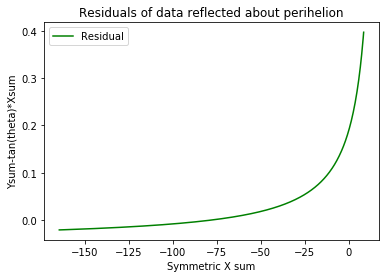

In [33]:
plt.plot(xsum,ysum-np.tan(theta0)*xsum, color="green", label="Residual")
plt.xlabel("Symmetric X sum")
plt.ylabel("Ysum-tan(theta)*Xsum")
plt.title("Residuals of data reflected about perihelion")
plt.legend()
plt.show()

I think the reason the residuals are so high close to perihelion (zero on the x axis) are that the velocity is very fast at perihelion and it is difficult for the adjacent points to precisely cancel. It still seems to level out toward zero in the aphelion limit, after the return of one cycle, which is good. On the other hand, a residual of 0.4 is simply too much. 